#Principal Component Analysis(PCA)

#Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Axes: xlabel='Type'>

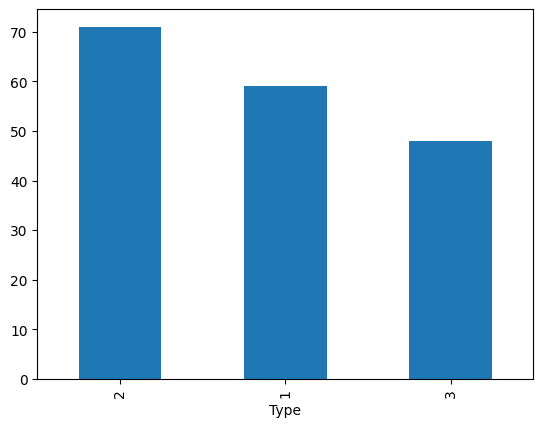

In [3]:
#bar graph
df['Type'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

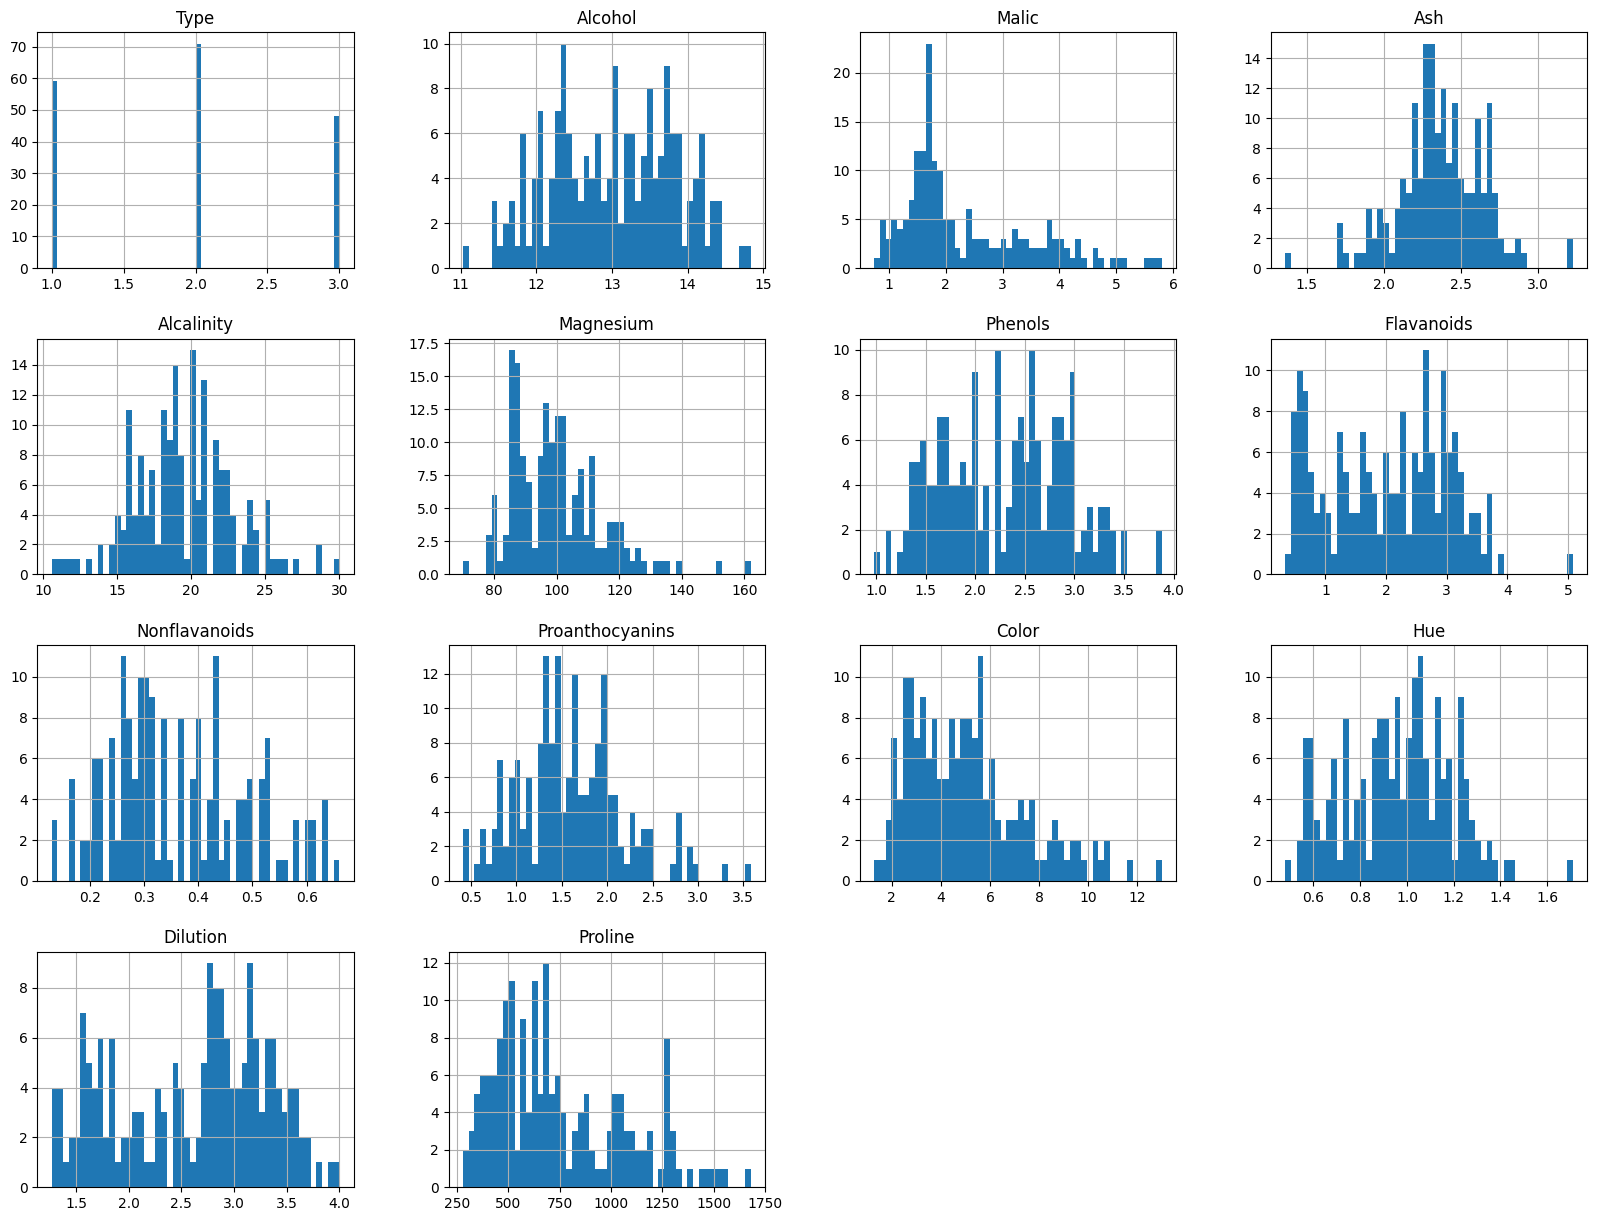

In [4]:
#histograms
df.hist(bins=50,figsize=(20,15))

<Axes: >

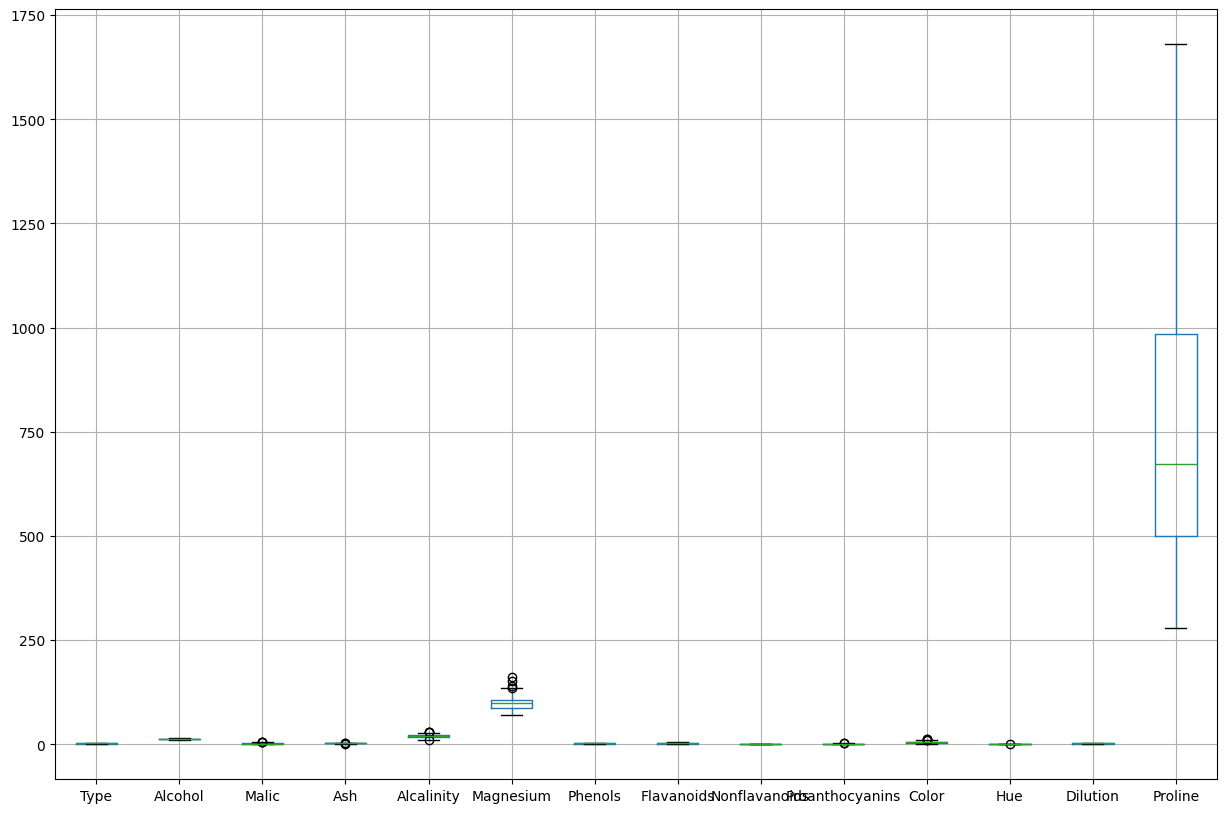

In [5]:
#box plots
numerical_cols=df.select_dtypes(include=[np.number])
numerical_cols.boxplot(figsize=(15,10))

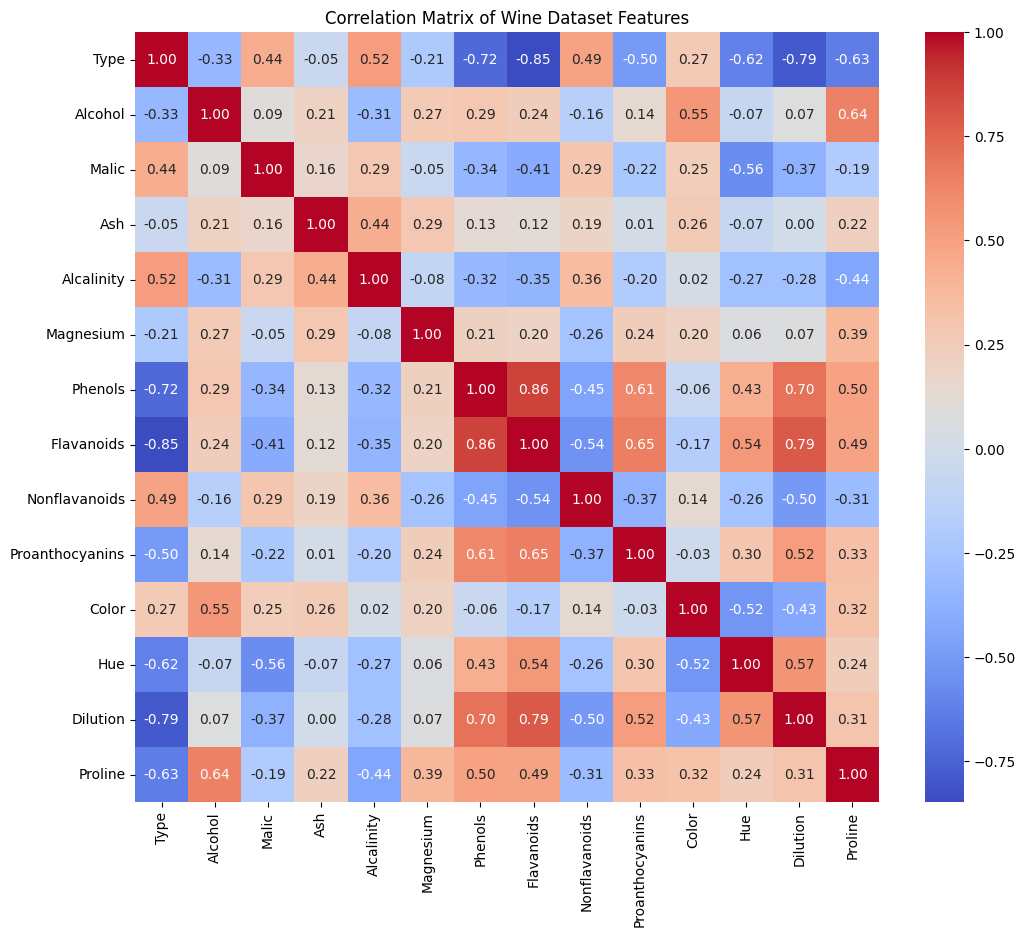

In [6]:
#correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

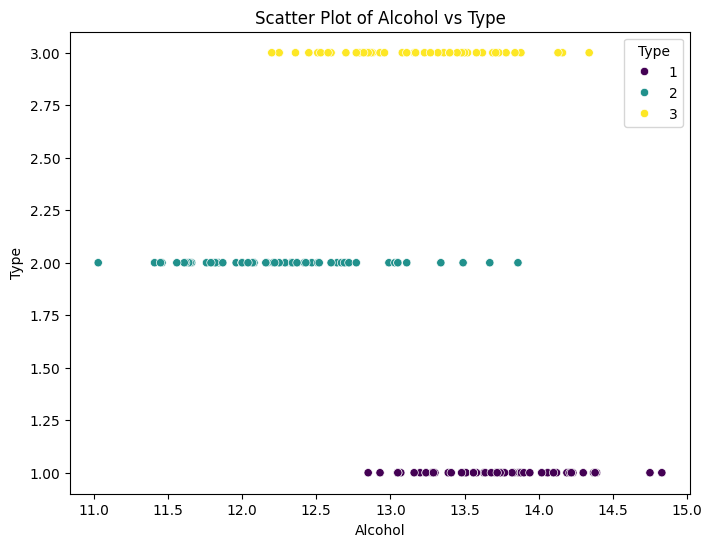

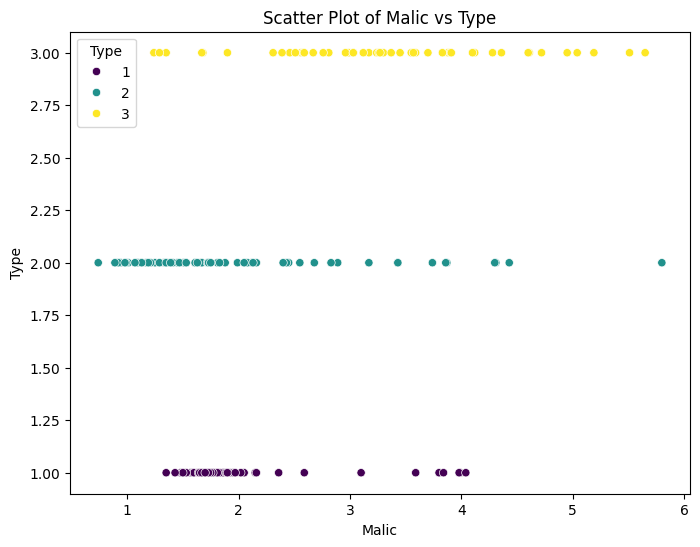

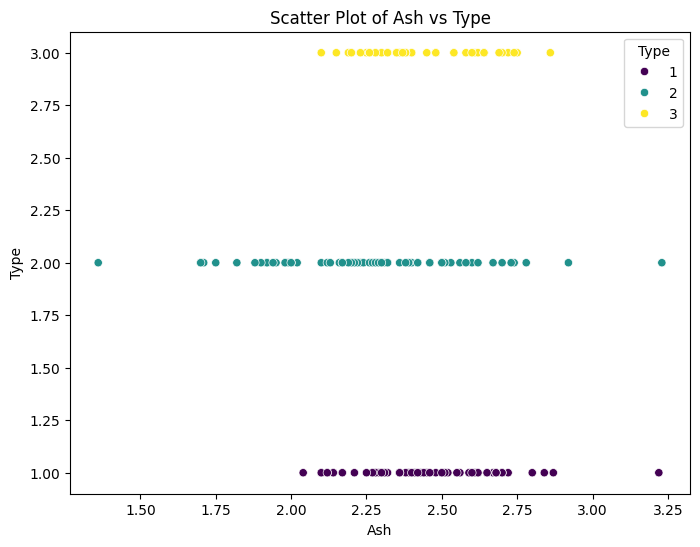

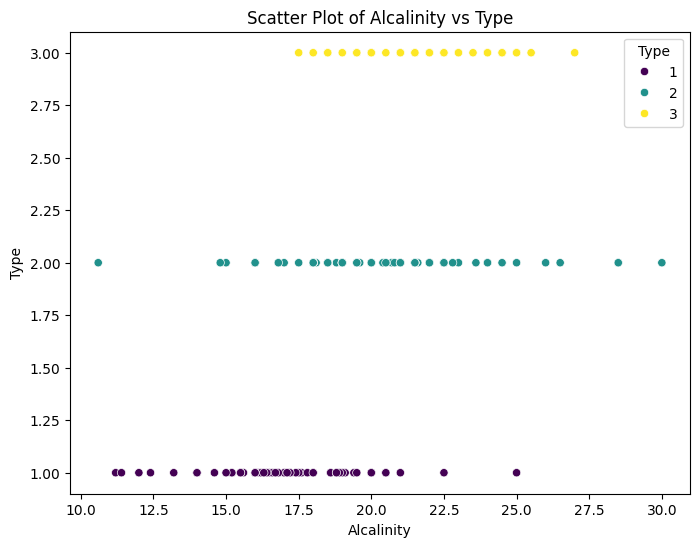

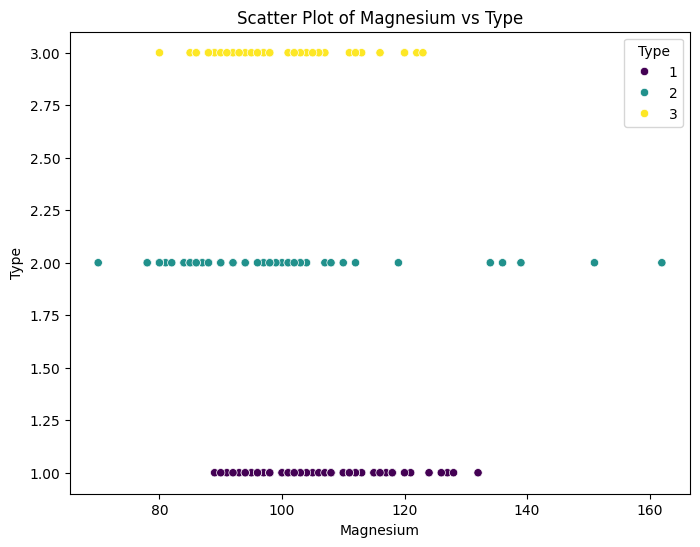

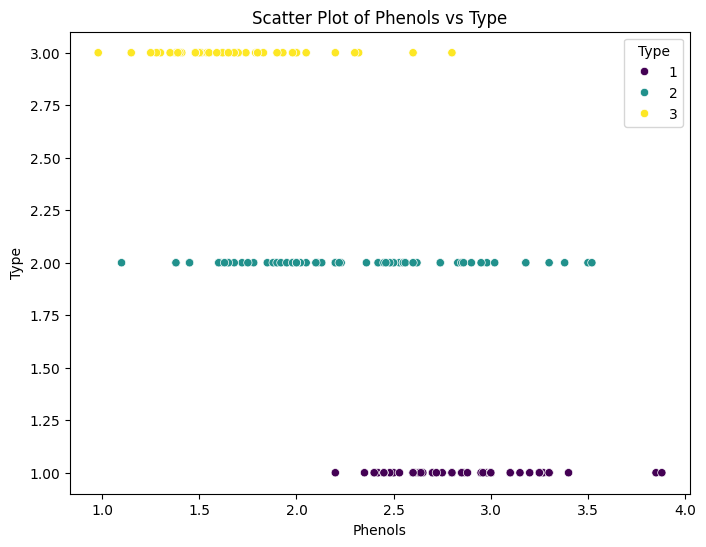

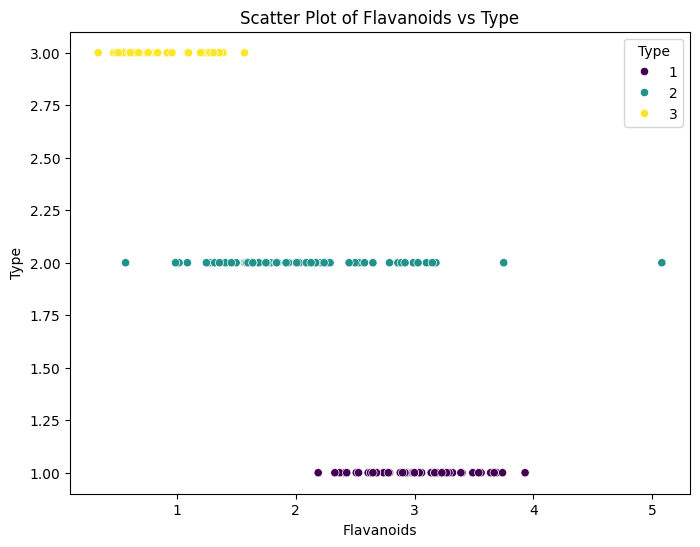

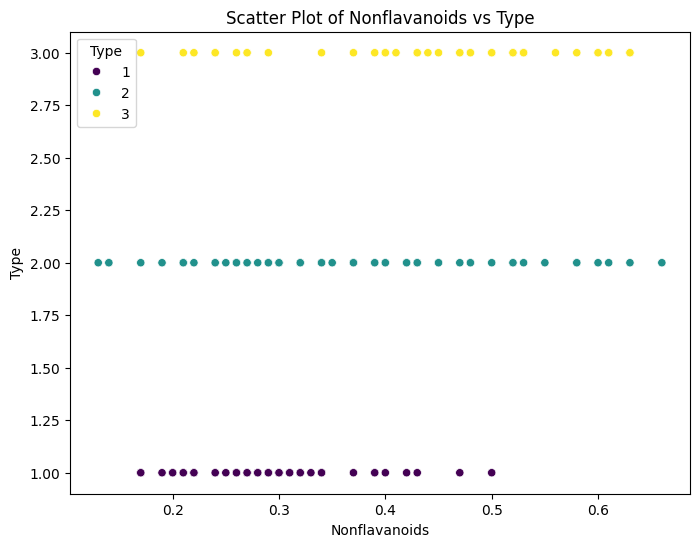

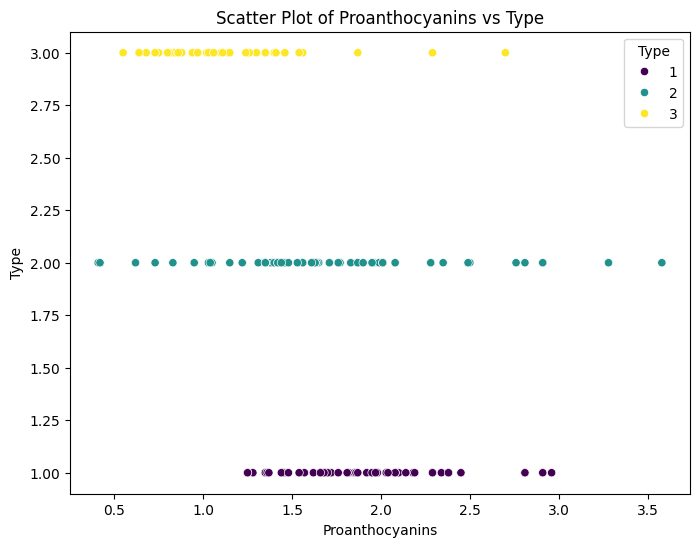

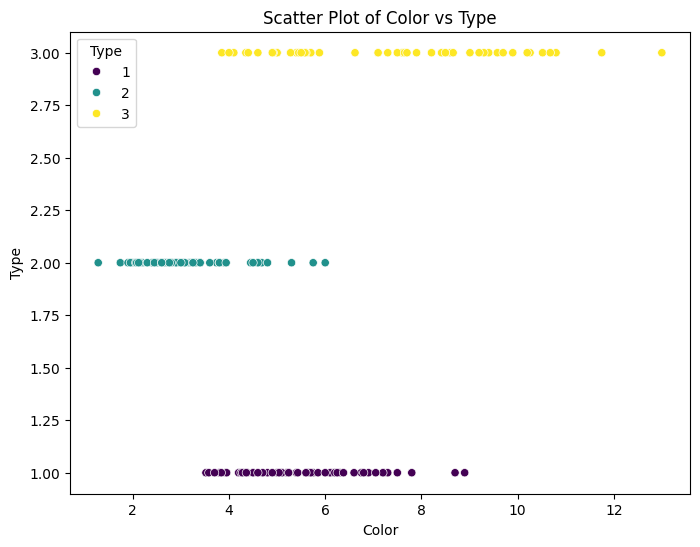

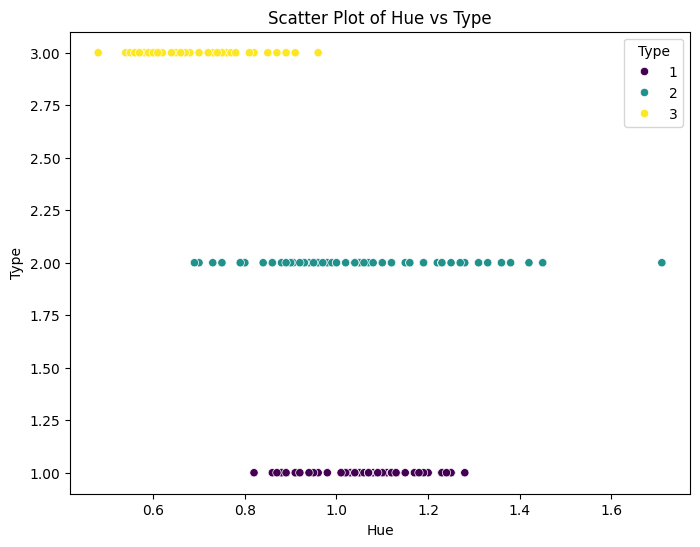

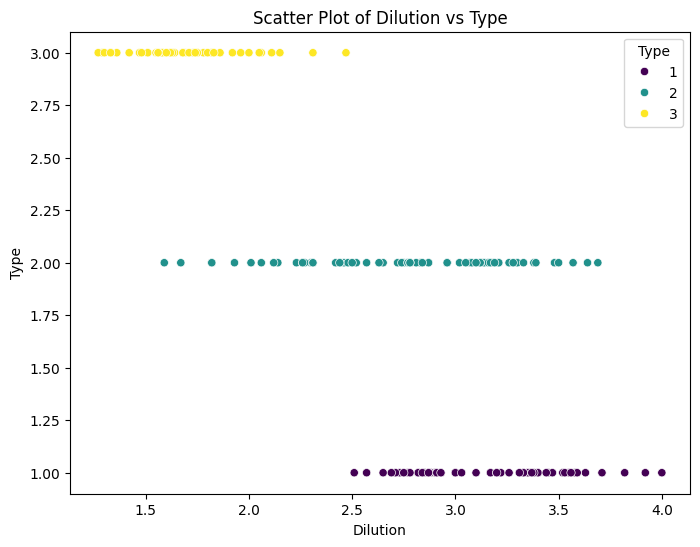

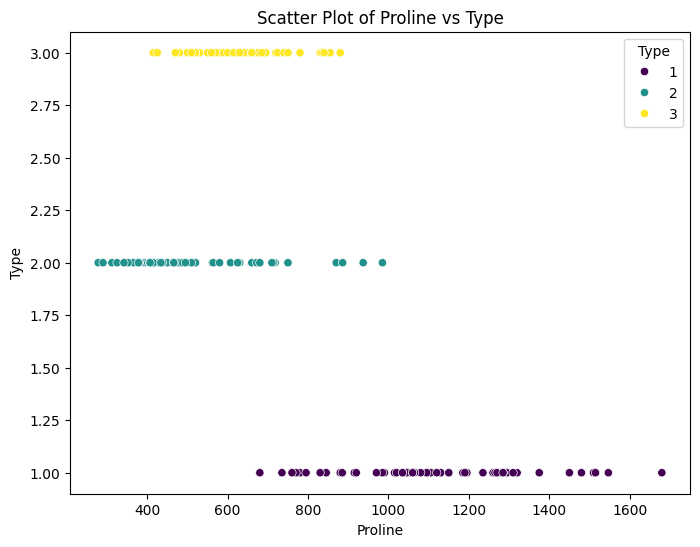

In [7]:
#scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Type' is the target variable
target_variable = 'Type'
features = df.columns.tolist()
features.remove(target_variable)

# Generate scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y=target_variable, hue=target_variable, palette='viridis')
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

#Task 2: Dimensionality Reduction with PCA

In [8]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit_transform(df_scaled)
PC = pd.DataFrame(PC)

PC

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626,-0.125419,0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588,0.055341,0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545,-0.027881,0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512,0.048784,-0.479793,0.313786,0.344120,-0.109515,0.102823


In [10]:
PC.var()

,0
0,5.567225
1,2.511184
2,1.454244
3,0.933160
4,0.882460
5,0.676579
6,0.556928
7,0.352012
8,0.296206
9,0.263788


#Task 3: Clustering with Original Data

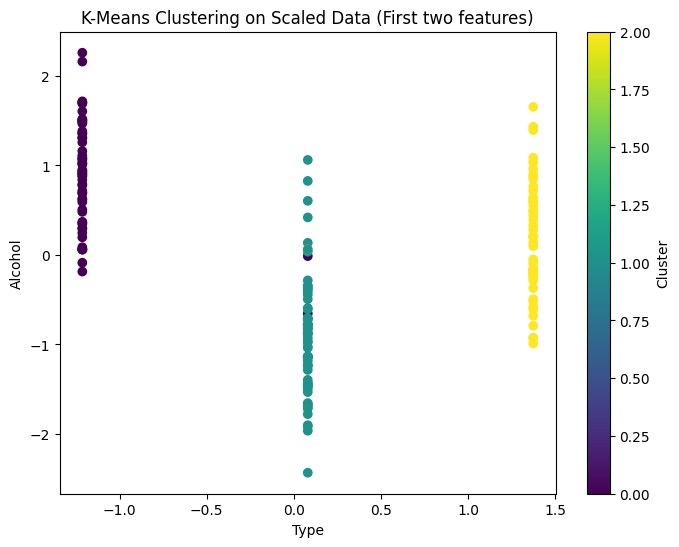

Clustering results on original dataset:
Silhouette Score: 0.30773604383565206
Davies-Bouldin Score: 1.3163957434114109


In [11]:
#k-means clustering
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=42, n_init=10) # Added random_state and n_init for reproducibility
model.fit(df_scaled)
df_scaled['cluster']=model.predict(df_scaled)

import matplotlib.pyplot as plt
# Plotting the first two columns of scaled data, colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['cluster'], cmap='viridis')
plt.title('K-Means Clustering on Scaled Data (First two features)')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.colorbar(label='Cluster')
plt.show()

from sklearn.metrics import silhouette_score,davies_bouldin_score
s_score=silhouette_score(df_scaled.drop('cluster', axis=1),df_scaled['cluster']) # Exclude cluster column for evaluation
d_score=davies_bouldin_score(df_scaled.drop('cluster', axis=1),df_scaled['cluster']) # Exclude cluster column for evaluation
print("Clustering results on original dataset:")
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {d_score}")

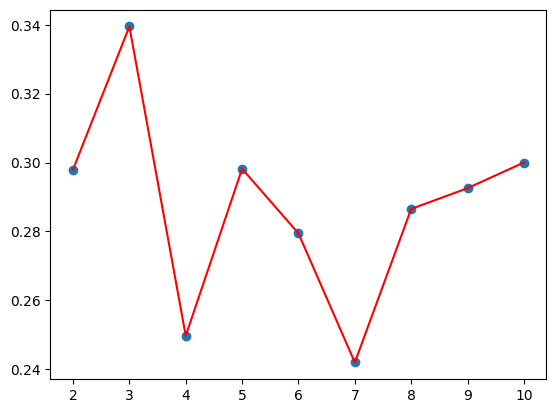

In [12]:
#try with different k values
scores = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    df_scaled["cluster"] = model.fit_predict(df_scaled)
    scores.append(silhouette_score(df_scaled,df_scaled["cluster"]))

import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color='red')
plt.show()

#Task 4: Clustering with PCA Data

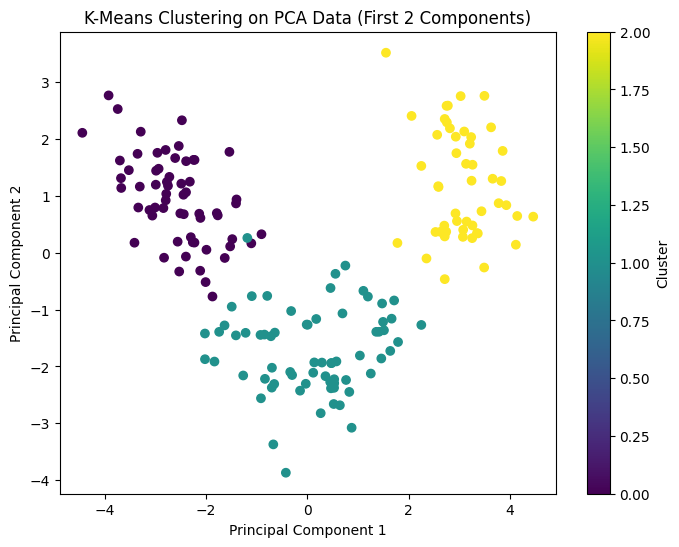

Clustering results on PCA data:
Silhouette Score (PCA data): 0.30773604383565206
Davies-Bouldin Score (PCA data): 1.3163957434114109


In [14]:
# k-means clustering on PCA data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Assuming 3 clusters based on the original 'Type' variable
model_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
model_pca.fit(PC)
PC['cluster_pca'] = model_pca.predict(PC)

# Visualize the clusters (using the first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(PC[0], PC[1], c=PC['cluster_pca'], cmap='viridis')
plt.title('K-Means Clustering on PCA Data (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# Evaluate the clustering
s_score_pca = silhouette_score(PC.drop('cluster_pca', axis=1), PC['cluster_pca']) # Exclude the cluster column for evaluation
d_score_pca = davies_bouldin_score(PC.drop('cluster_pca', axis=1), PC['cluster_pca']) # Exclude the cluster column for evaluation

print("Clustering results on PCA data:")
print(f"Silhouette Score (PCA data): {s_score_pca}")
print(f"Davies-Bouldin Score (PCA data): {d_score_pca}")

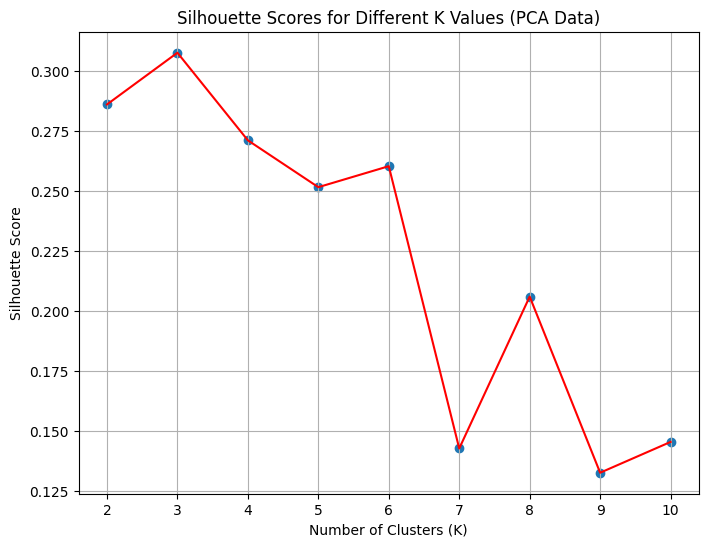

In [15]:
#try with different k values for PCA data
scores_pca = []
# Exclude the 'cluster_pca' column from PC for clustering
PC_numerical = PC.drop('cluster_pca', axis=1)

for i in range(2,11):
    model_pca = KMeans(n_clusters=i, random_state=42, n_init=10)
    # Fit and predict on the numerical PCA data
    cluster_labels_pca = model_pca.fit_predict(PC_numerical)
    # Calculate silhouette score using the numerical PCA data and the generated cluster labels
    scores_pca.append(silhouette_score(PC_numerical, cluster_labels_pca))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(range(2,11),scores_pca)
plt.plot(range(2,11),scores_pca,color='red')
plt.title('Silhouette Scores for Different K Values (PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

original_type = df['Type']
pca_clusters = PC['cluster_pca']

cluster_mapping = {}
for cluster_label in pca_clusters.unique():
    dominant_type = original_type[pca_clusters == cluster_label].mode()[0]
    cluster_mapping[cluster_label] = dominant_type

mapped_pca_clusters = pca_clusters.map(cluster_mapping)

conf_matrix = confusion_matrix(original_type, mapped_pca_clusters)

print("Confusion Matrix (Mapped Clusters vs Original Type):")
print(conf_matrix)

print("\nClassification Report (Mapped Clusters vs Original Type):")
target_names = [str(i) for i in sorted(original_type.unique())]
print(classification_report(original_type, mapped_pca_clusters, target_names=target_names, zero_division=0))

print("\nCross-tabulation of Original Type and PCA Clusters:")
cross_tab = pd.crosstab(original_type, pca_clusters, rownames=['Original Type'], colnames=['PCA Cluster'])
print(cross_tab)

Confusion Matrix (Mapped Clusters vs Original Type):
[[59  0  0]
 [ 2 68  1]
 [ 0  0 48]]

Classification Report (Mapped Clusters vs Original Type):
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        59
           2       1.00      0.96      0.98        71
           3       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.99      0.98       178
weighted avg       0.98      0.98      0.98       178


Cross-tabulation of Original Type and PCA Clusters:
PCA Cluster     0   1   2
Original Type            
1              59   0   0
2               2  68   1
3               0   0  48


#Task 5: Comparison and Analysis

#Clustering results on original dataset:

Silhouette Score: 0.3064761262626887

Davies-Bouldin Score: 1.322406131227342

#Clustering results on PCA data:

Silhouette Score (PCA data): 0.30773604383565206

Davies-Bouldin Score (PCA data): 1.3163957434114109


* There is a difference in between the clustering results but not much of a difference, there is only a slight increase in the silhouette score for the clustering on PCA data.

* From the analysis we did not a desirable output even after using the PCA and clustering directly on the original dataset,so the trade-off is not worth it.

#Task 6: Conclusion and Insights

* In unsupervised learning since we do not have a target variable,PCA and clustering will be very useful as PCA reduces the dimensions that are not neccessary and clustering groups the variables based on certain similarities like data points which are nearer to each other will be made as one cluster.Practically developing a machine learning model with so many x variables and without a target variable is very difficult the these two will techiniques will be used to do the analysis on the data and then develop a model if needed.

* So I can recommend to use these techniques in a real world data set where we cannot make predictions since there is no target variable and where the performance is being hindered because we have too many x variables to improve the performance and to develop a model.